In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

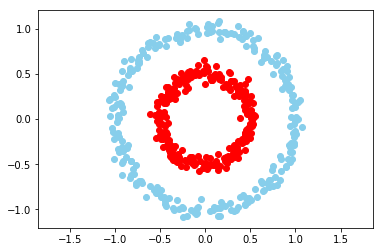

In [2]:
#Crear Dataset
n = 500
p = 2

X , Y = make_circles(n_samples=n,factor = 0.5, noise = 0.05)
#print(Y)
plt.scatter(X[Y == 0,0],X[Y == 0,1],c= "skyblue")
plt.scatter(X[Y == 1,0],X[Y == 1,1],c ="red")
plt.axis("equal")
plt.show()

In [3]:
#clase de la capa de la red

class neural_layer():

    def __init__(self,n_con,n_neur,act_f):
        
        self.act_f= act_f
        
        self.b = np.random.rand(1,n_neur) * 2-1
        self.w = np.random.rand(n_con,n_neur) * 2-1

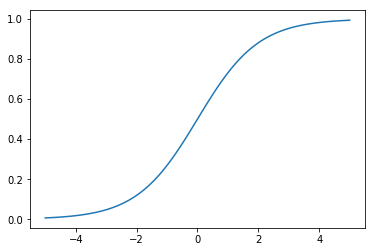

In [4]:
#funciones de activacion

sigm = (lambda x: 1/ (1+np.e **(-x)),
        lambda x:x * (1-x))
        
 #relu,tangente ipervolica
#relu = lambda x: np.maximum(0,x)
        
        
_x = np.linspace(-5,5,100)
plt.plot(_x,sigm[0](_x))

In [5]:
#l0 = neural_layer(p,4,sigm)
#l1 = neural_layer(4,8,sigm)
#...

#topology =[p,4,8,16,9,4,1]


def create_nn(topology, act_f):
    
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
    
        nn.append(neural_layer(topology[1],topology[l+1],act_f))
    
    return nn
#topology =[p,4,8,16,9,4,1]

#create_nn(topology,sigm)

topology =[p,4,8,16,9,4,1]

neural_net = create_nn(topology,sigm)

l2_cost = (lambda Yp,Yr: np.mean((Yp-Yr)**2),
           lambda Yp,Yr: (Yp - Yr))
def train(neural_net, X, Y, l2_cost, lr=0.5,train=true):
    #Forward pass
    #out = [(z0,a0),(z1,a1),etc]
        out = [(None,X)]
    
        for l, layer in enumerate(neural_net):
  
                    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
                    a = neural_net[l].act_f[0](z)
  
                    out.append((z, a))
            
                    print(out[-1],[1])
            
            
        train(neural_net, X, Y, l2_cost, 0.5)
               
#   z = X @ neural_net[0].w + neural_net[0].b
#a = neural_net[0].act_f(z)
#  a @neural_net

In [58]:
# FUNCION DE ENTRENAMIENTO

topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)  

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))



def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
  out = [(None, X)]
  
  # Forward pass
  for l, layer in enumerate(neural_net):
  
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
  
    out.append((z, a))
    
  
  if train:
    
    # Backward pass 
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
          z = out[l+1][0]
          a = out[l+1][1]
      
          if l == len(neural_net) - 1:
            deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
          else:
            deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

          _W = neural_net[l].W

              # Gradient descent
                    neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr  
                    neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

          return out[-1][1]


            train(neural_net, X, Y, l2_cost, 0.5)
    print("")

IndentationError: unexpected indent (<ipython-input-58-16979b4bf8dd>, line 43)